In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import seaborn as sns
import numpy as np
import pandas as pd
from collections import defaultdict, OrderedDict
from tqdm import tqdm
import pickle

# ComBat Batch Correction

To adjust for batch correction between TCGA and GTEx, ComBat was run on the complete dataset after GTEx and TCGA were separately quantile normalized, as per Muller, _et. al._

**Steps**
- Quantile normalize GTEx and TCGA samples separately
- Remove low variance genes (std across all samples for a gene < 1)
- Combine dataframes and run ComBat
- Set all negative values to 0 
- Split out dataframes for each tissue

Finally, DESeq2 was performed using the raw expression counts and then run on the ComBat corrected dataframes.

In [2]:
n = {x[:-4]: pd.read_csv('nonpairwise-results/' + x, sep='\t', index_col=0) 
     for x in os.listdir('nonpairwise-results/')}
c = {x[:-4]: pd.read_csv('nonpairwise-combat/results/' + x, sep='\t', index_col=0) 
     for x in os.listdir('nonpairwise-combat/results/')}

In [13]:
def plot_ranks(ref_genes, genes_to_rank, tissue, ax):
    temp = {}
    rank = []
    inter = set(ref_genes).intersection(set(genes_to_rank))
    ref_genes = [x for x in ref_genes if x in inter]
    genes_to_rank = [x for x in genes_to_rank if x in inter]
    for i, gene in enumerate(ref_genes):
        temp[gene] = i
    for gene in genes_to_rank:
        rank.append(temp[gene])
    
    x = np.array([x for x in xrange(len(rank))])
    y = np.array(rank)
    sns.regplot(x, y, ax=ax, scatter_kws={'alpha':0.03})
    ax.set_title(tissue)

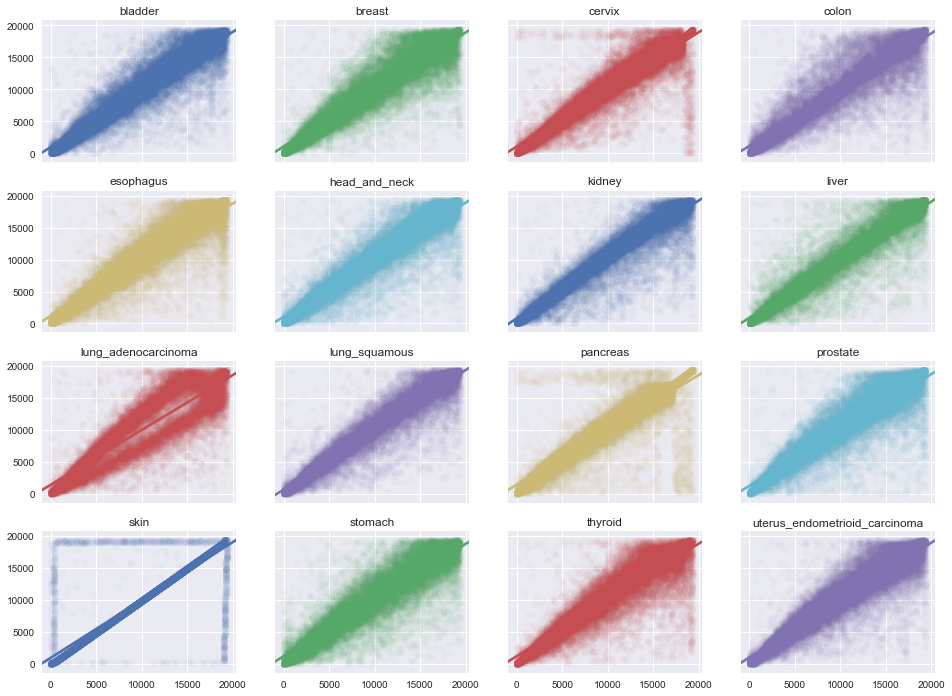

In [14]:
f, axes = plt.subplots(4, 4, figsize=(16, 12), sharex=True, sharey=True)
axes = axes.flatten()
for i, t in enumerate(sorted(n.keys())):
    plot_ranks(n[t].index, c[t].index, t, ax=axes[i])